Machine learning  methods


Preprocessing

In [41]:
#Function written to plot confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    ax = plt.gca()
    ax.set_ylim(-.5, 5.5)
        
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
#Function generated to run any model
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Reds):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('|Accuracy|')
   
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('|Confusion Matrix|')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    ax = plt.gca()
    ax.set_ylim(-.5,5.5)
    plt.show()
    # get classification report
    print('|Classifiction Report|')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [43]:
#Method to print attributes for gridSearch
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('|      Best Estimator     |')
    print('\n\t{}\n'.format(model.best_estimator_))
    # parameters that gave best results while performing grid search
    print('|Best parameters|')
   
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('|   No of CrossValidation sets   |')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('|        Best Score       |')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [44]:
#Importing libraries
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

Machine learning methods for Hand to mouth movements

In [45]:
#Reading in hand to mouth gestures
import numpy as np
import pandas as pd
htm= pd.read_csv('htmallgesturesfinal.csv')
htm.head()
#print(htm.shape)


,aX,aY,aZ,gX,gY,gZ,gesture
0,0.272,-1.297,0.457,69.519,-38.818,12.390,1
1,0.257,-1.252,0.480,65.063,-39.307,18.494,1
2,0.266,-1.249,0.483,62.073,-38.452,25.940,1
3,0.298,-1.223,0.468,51.880,-34.729,41.260,1
4,0.299,-1.164,0.462,47.791,-32.959,48.157,1


In [46]:
#Splitting gesture data and gesture classification
X = htm.drop(['gesture'], axis=1)
y = htm.gesture
print(X.shape, y.shape)

(12019, 6) (12019,)


In [47]:
# splitting X and y into training and testing sets for hand to mouth gestures
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((9014, 6),(9014,))
X_test  and y_test  : ((3005, 6),(3005,))


In [48]:
#Generating labels for hand to mouth gestures
labelshtm = ["Drinking", "Eating Apple", "Spoon to Mouth", "Fork to Mouth", "Eating Sweets"]

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ronan\AppData\Local\Programs\Pyth

Done 
 

training_time(HH:MM:SS.ms) - 0:00:07.375994


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.004000


|Accuracy|

    0.6096505823627287


|Confusion Matrix|

 [[366   0 183  70   0]
 [  0 488   4   0  36]
 [339 105 168  77   8]
 [ 65   0 231 301   0]
 [  5  23  14  13 509]]


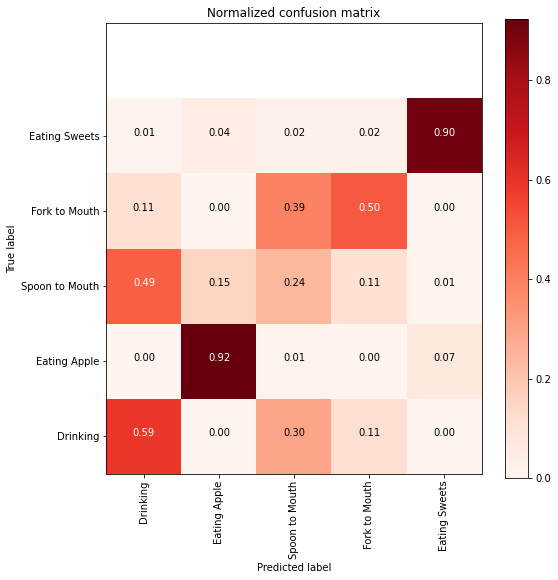

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.47      0.59      0.53       619
           2       0.79      0.92      0.85       528
           3       0.28      0.24      0.26       697
           4       0.65      0.50      0.57       597
           5       0.92      0.90      0.91       564

    accuracy                           0.61      3005
   macro avg       0.62      0.63      0.62      3005
weighted avg       0.60      0.61      0.60      3005



In [49]:
# logistic regression for hand to mouth movements
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labelshtm)

training the model..
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.911999


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.163003


|Accuracy|

    0.5344425956738769


|Confusion Matrix|

 [[195   0 352  69   3]
 [  4 457  16   3  48]
 [368  82 153  85   9]
 [120   2 105 354  16]
 [ 12  48  17  40 447]]


C:\Users\ronan\AppData\Local\Temp\ipykernel_19964\3379774174.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


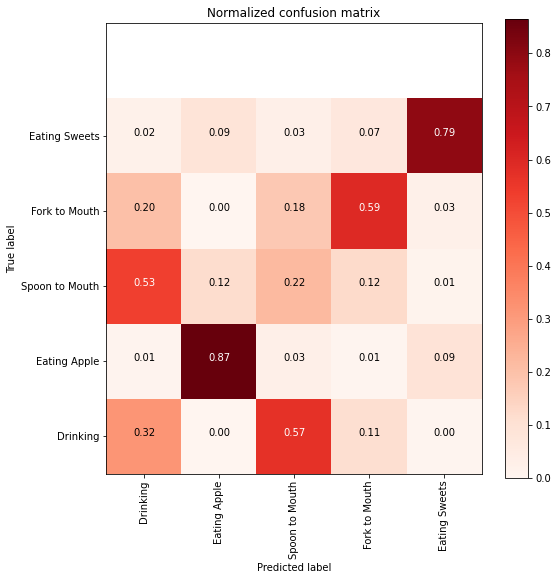

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.28      0.32      0.30       619
           2       0.78      0.87      0.82       528
           3       0.24      0.22      0.23       697
           4       0.64      0.59      0.62       597
           5       0.85      0.79      0.82       564

    accuracy                           0.53      3005
   macro avg       0.56      0.56      0.56      3005
weighted avg       0.54      0.53      0.53      3005



In [50]:
#KNN for hand to mouth movements
from sklearn.neighbors import KNeighborsClassifier

#knn
# start Grid search
parameters = {'n_neighbors': [1, 10, 11, 20, 30]}
log_knn = KNeighborsClassifier(n_neighbors=19)

log_knn_grid = GridSearchCV(log_knn, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_knn_grid_results =  perform_model(log_knn_grid, X_train, y_train, X_test, y_test, class_labels=labelshtm)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.358000


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.003001


|Accuracy|

    0.7304492512479202


|Confusion Matrix|

 [[115   0 487  17   0]
 [  0 507  17   0   4]
 [179  27 471  18   2]
 [ 17   0  26 554   0]
 [  0   5   2   9 548]]


C:\Users\ronan\AppData\Local\Temp\ipykernel_19964\3379774174.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


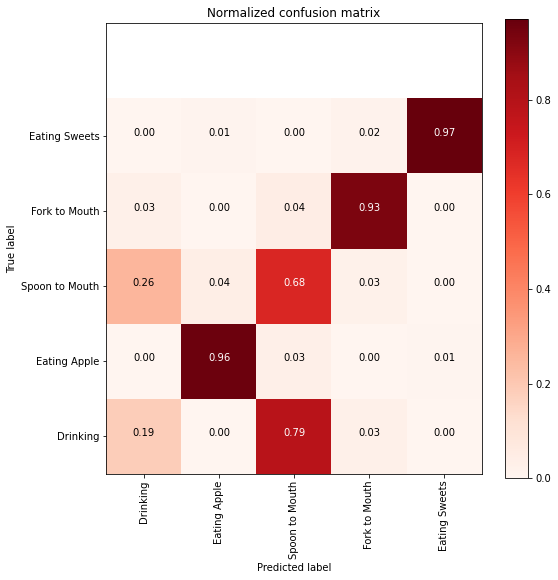

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.37      0.19      0.25       619
           2       0.94      0.96      0.95       528
           3       0.47      0.68      0.55       697
           4       0.93      0.93      0.93       597
           5       0.99      0.97      0.98       564

    accuracy                           0.73      3005
   macro avg       0.74      0.74      0.73      3005
weighted avg       0.72      0.73      0.71      3005

|      Best Estimator     |

	DecisionTreeClassifier(max_depth=9)

|Best parameters|
	Parameters of best estimator : 

	{'max_depth': 9}

|   No of CrossValidation sets   |

	Total numbre of cross validation sets: 5

|        Best Score       |

	Average Cross Validate scores of best estimator : 

	0.7290869884512371



In [51]:
#Decision Tree for hand to mouth movements
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labelshtm)
print_grid_search_attributes(dt_grid_results['model'])

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:06.383998


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007002


|Accuracy|

    0.7078202995008319


|Confusion Matrix|

 [[205   0 384  30   0]
 [  0 520   2   1   5]
 [288  82 293  32   2]
 [ 10   0  16 571   0]
 [  0   2   0  24 538]]


C:\Users\ronan\AppData\Local\Temp\ipykernel_19964\3379774174.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


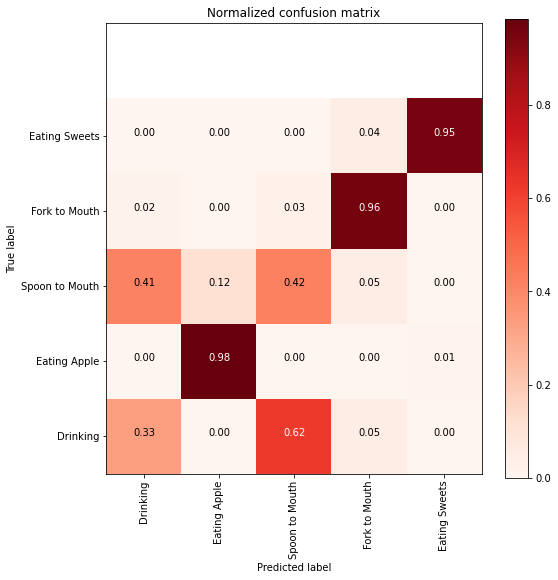

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.41      0.33      0.37       619
           2       0.86      0.98      0.92       528
           3       0.42      0.42      0.42       697
           4       0.87      0.96      0.91       597
           5       0.99      0.95      0.97       564

    accuracy                           0.71      3005
   macro avg       0.71      0.73      0.72      3005
weighted avg       0.69      0.71      0.70      3005

|      Best Estimator     |

	RandomForestClassifier(max_depth=7, n_estimators=10)

|Best parameters|
	Parameters of best estimator : 

	{'max_depth': 7, 'n_estimators': 10}

|   No of CrossValidation sets   |

	Total numbre of cross validation sets: 5

|        Best Score       |

	Average Cross Validate scores of best estimator : 

	0.712557502202212



In [52]:
#Random Forest Classifier for hand to mouth movements
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labelshtm)
print_grid_search_attributes(rfc_grid_results['model'])

In [53]:
import numpy as np
import tensorflow as tf
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
GESTURES = [
    "htmallgesturesfinal"
    
]

SAMPLES_PER_GESTURE = 119
NUM_GESTURES = len(GESTURES)

ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
inputs = []
outputs = []

for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv(gesture + ".csv", low_memory=False)
  
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j

      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

inputs = np.array(inputs)
outputs = np.array(outputs)

Processing index 0 for gesture 'htmallgesturesfinal'.
	There are 101 recordings of the htmallgesturesfinal gesture.


In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu')) 
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) 
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','accuracy'])
history = model.fit(X_train, y_train, epochs=600, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/600
9014/9014 [==============================] - 16s 2ms/step - loss: 6.1023 - mae: 2.0357 - accuracy: 0.1954 - val_loss: 5.8945 - val_mae: 1.9864 - val_accuracy: 0.2060
Epoch 2/600
9014/9014 [==============================] - 14s 2ms/step - loss: 6.1023 - mae: 2.0357 - accuracy: 0.1954 - val_loss: 5.8945 - val_mae: 1.9864 - val_accuracy: 0.2060
Epoch 3/600
9014/9014 [==============================] - 14s 2ms/step - loss: 6.1023 - mae: 2.0357 - accuracy: 0.1954 - val_loss: 5.8945 - val_mae: 1.9864 - val_accuracy: 0.2060
Epoch 4/600
9014/9014 [==============================] - 14s 2ms/step - loss: 6.1023 - mae: 2.0357 - accuracy: 0.1954 - val_loss: 5.8945 - val_mae: 1.9864 - val_accuracy: 0.2060
Epoch 5/600
9014/9014 [==============================] - 14s 2ms/step - loss: 6.1023 - mae: 2.0357 - accuracy: 0.1954 - val_loss: 5.8945 - val_mae: 1.9864 - val_accuracy: 0.2060
Epoch 6/600
9014/9014 [==============================] - 14s 2ms/step - loss: 6.1023 - mae: 2.0357 - accuracy:

Non-hand to mouth

In [55]:
#Reading in  non-hand to mouth gestures
nonhtm = pd.read_csv('nonhtmallgesturesfinal.csv')
nonhtm.head()
#print( nonhtm.shape)

,aX,aY,aZ,gX,gY,gZ,gesture
0,0.099,1.658,0.412,94.116,-36.255,-26.062,1
1,0.078,1.196,0.562,127.319,-26.978,-42.603,1
2,0.155,0.714,0.749,139.648,-13.000,-47.668,1
3,0.217,0.500,0.919,141.418,-4.578,-50.903,1
4,0.232,0.435,0.878,136.108,-1.587,-59.875,1


In [56]:
#Splitting gesture data and gesture classification
X1 = nonhtm.drop(['gesture'], axis=1)
y1 = nonhtm.gesture
print(X1.shape, y1.shape)

(12138, 6) (12138,)


In [57]:
#splitting X and y into training and testing sets for non-hand to mouth gestures
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=1)
print('X_train1 and y_train1 : ({},{})'.format(X_train1.shape, y_train1.shape))
print('X_test1  and y_test1  : ({},{})'.format(X_test1.shape, y_test1.shape))

X_train1 and y_train1 : ((9103, 6),(9103,))
X_test1  and y_test1  : ((3035, 6),(3035,))


In [58]:
#Generating labels for non-hand to mouth gesture
labelsnonhtm = ["Head Scratch", "Using phone", "Reaching", "Typing", "Writing" ]

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ronan\AppData\Local\Programs\Pyth

Done 
 

training_time(HH:MM:SS.ms) - 0:00:11.926935


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.025000


|Accuracy|

    0.7762767710049423


|Confusion Matrix|

 [[630   7  10  12  20]
 [  7 136  82 381   2]
 [ 16  53 440  34   9]
 [  2  23   5 564   3]
 [  1   0  12   0 586]]


C:\Users\ronan\AppData\Local\Temp\ipykernel_19964\3379774174.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


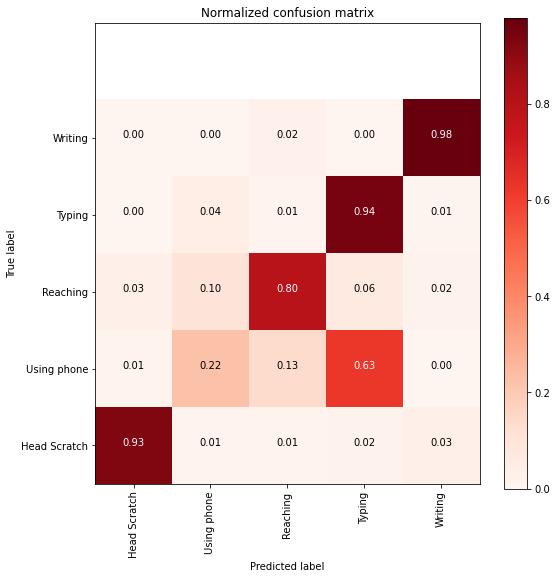

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.96      0.93      0.94       679
           2       0.62      0.22      0.33       608
           3       0.80      0.80      0.80       552
           4       0.57      0.94      0.71       597
           5       0.95      0.98      0.96       599

    accuracy                           0.78      3035
   macro avg       0.78      0.77      0.75      3035
weighted avg       0.78      0.78      0.75      3035



In [59]:
# Grid search for non-hand to mouth movements
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train1, y_train1, X_test1, y_test1, class_labels=labelsnonhtm)

training the model..
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.857934


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.072859


|Accuracy|

    0.7373970345963756


|Confusion Matrix|

 [[552  43  35  35  14]
 [ 25 399  74  93  17]
 [ 14  57 419  44  18]
 [ 14 107  58 389  29]
 [ 19  31  28  42 479]]


C:\Users\ronan\AppData\Local\Temp\ipykernel_19964\3379774174.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


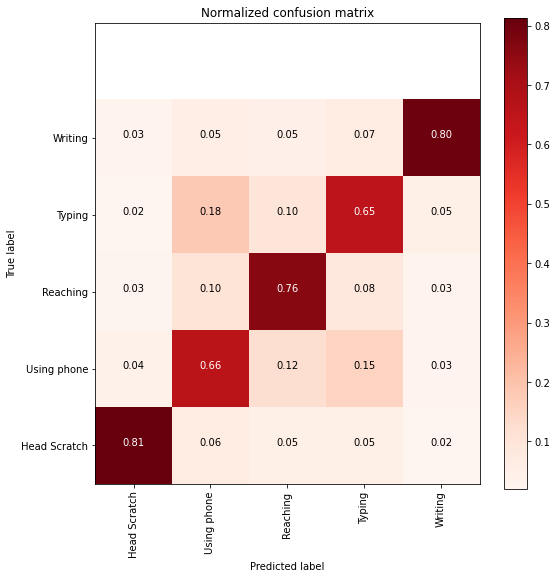

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.88      0.81      0.85       679
           2       0.63      0.66      0.64       608
           3       0.68      0.76      0.72       552
           4       0.65      0.65      0.65       597
           5       0.86      0.80      0.83       599

    accuracy                           0.74      3035
   macro avg       0.74      0.74      0.74      3035
weighted avg       0.74      0.74      0.74      3035



In [60]:
#KNN for non-hand to mouth movements
from sklearn.neighbors import KNeighborsClassifier

#knn
# start Grid search
parameters = {'n_neighbors': [1, 10, 11, 20, 30]}
log_knn = KNeighborsClassifier(n_neighbors=19)

log_knn_grid = GridSearchCV(log_knn, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_knn_grid_results =  perform_model(log_knn_grid, X_train1, y_train1, X_test1, y_test1, class_labels=labelsnonhtm)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.333638


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.002001


|Accuracy|

    0.9238879736408566


|Confusion Matrix|

 [[673   4   1   1   0]
 [  1 442  36 127   2]
 [  3  16 530   3   0]
 [  0  26   2 569   0]
 [  1   2   5   1 590]]


C:\Users\ronan\AppData\Local\Temp\ipykernel_19964\3379774174.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


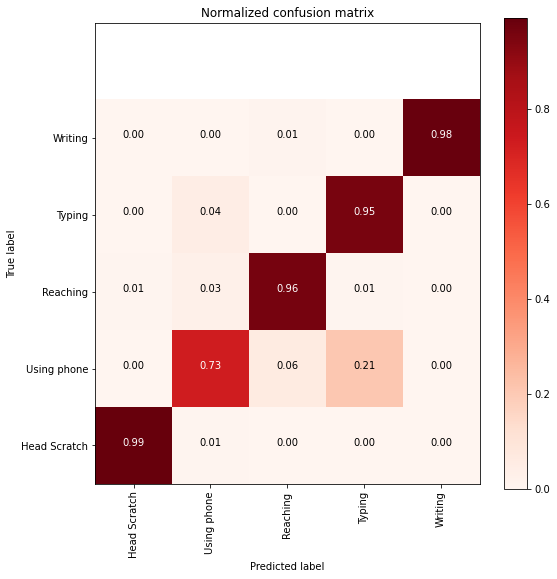

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       679
           2       0.90      0.73      0.81       608
           3       0.92      0.96      0.94       552
           4       0.81      0.95      0.88       597
           5       1.00      0.98      0.99       599

    accuracy                           0.92      3035
   macro avg       0.93      0.92      0.92      3035
weighted avg       0.93      0.92      0.92      3035

|      Best Estimator     |

	DecisionTreeClassifier(max_depth=9)

|Best parameters|
	Parameters of best estimator : 

	{'max_depth': 9}

|   No of CrossValidation sets   |

	Total numbre of cross validation sets: 5

|        Best Score       |

	Average Cross Validate scores of best estimator : 

	0.9170605451659817



In [61]:
#Decision Tree for hand to mouth movements
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train1, y_train1, X_test1, y_test1, class_labels=labelsnonhtm)
print_grid_search_attributes(dt_grid_results['model'])

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:49.992522


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.080999


|Accuracy|

    0.9693574958813839


|Confusion Matrix|

 [[677   2   0   0   0]
 [  1 563  16  28   0]
 [  2   8 538   3   1]
 [  0  27   1 569   0]
 [  1   1   1   1 595]]


C:\Users\ronan\AppData\Local\Temp\ipykernel_19964\3379774174.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


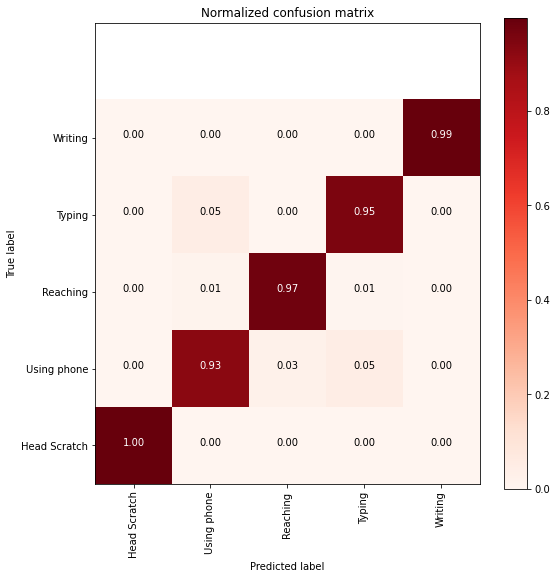

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       679
           2       0.94      0.93      0.93       608
           3       0.97      0.97      0.97       552
           4       0.95      0.95      0.95       597
           5       1.00      0.99      1.00       599

    accuracy                           0.97      3035
   macro avg       0.97      0.97      0.97      3035
weighted avg       0.97      0.97      0.97      3035

|      Best Estimator     |

	RandomForestClassifier(max_depth=13, n_estimators=190)

|Best parameters|
	Parameters of best estimator : 

	{'max_depth': 13, 'n_estimators': 190}

|   No of CrossValidation sets   |

	Total numbre of cross validation sets: 5

|        Best Score       |

	Average Cross Validate scores of best estimator : 

	0.9660548183282944



In [62]:
#Random Forest Classifier for non-hand to mouth movements
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train1, y_train1, X_test1, y_test1, class_labels=labelsnonhtm)
print_grid_search_attributes(rfc_grid_results['model'])

In [63]:
#Neural Network for non hand to mouth gestures
import numpy as np
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
NONHTMGESTURES = [
    "nonhtmallgesturesfinal"
    
]

SAMPLES_PER_NONHTMGESTURE = 119
NUM_NONHTMGESTURES = len(GESTURES)

ONE_HOT_ENCODED_NONHTMGESTURES = np.eye(NUM_NONHTMGESTURES)
inputsnonhtm = []
outputsnonhtm = []

for nonhtmgesture_index in range(NUM_NONHTMGESTURES):
  nonhtmgesture = NONHTMGESTURES[nonhtmgesture_index]
  print(f"Processing index {nonhtmgesture_index} for nonhtmgesture '{nonhtmgesture}'.")
  
  output = ONE_HOT_ENCODED_NONHTMGESTURES[nonhtmgesture_index]
  
  df = pd.read_csv(nonhtmgesture + ".csv", low_memory=False)
  
  num_recordings = int(df.shape[0] / SAMPLES_PER_NONHTMGESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {nonhtmgesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_NONHTMGESTURE):
      index = i * SAMPLES_PER_NONHTMGESTURE + j

      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputsnonhtm.append(tensor)
    outputsnonhtm.append(output)

inputsnonhtm = np.array(inputsnonhtm)
outputsnonhtm= np.array(outputsnonhtm)

Processing index 0 for nonhtmgesture 'nonhtmallgesturesfinal'.
	There are 102 recordings of the nonhtmallgesturesfinal gesture.


In [64]:
num_inputsnonhtm = len(inputsnonhtm)
randomizenonhtm = np.arange(num_inputsnonhtm)
np.random.shuffle(randomizenonhtm)

inputsnonhtm = inputsnonhtm[randomizenonhtm]
outputsnonhtm = outputsnonhtm[randomizenonhtm]

TRAIN_SPLITNONHTM = int(0.6 * num_inputsnonhtm)
TEST_SPLITNONHTM = int(0.2 * num_inputsnonhtm + TRAIN_SPLITNONHTM)

inputs_train_nonhtm, inputs_test_nonhtm, inputs_validate_nnhtm = np.split(inputsnonhtm, [TRAIN_SPLITNONHTM, TEST_SPLITNONHTM])
outputs_train_nonhtm, outputs_test_nonhtm, outputs_validate_nonhtm = np.split(outputsnonhtm, [TRAIN_SPLITNONHTM, TEST_SPLITNONHTM])

In [65]:
from tensorflow import keras
from tensorflow.keras import layers

In [66]:
model_non = tf.keras.Sequential()
model_non.add(tf.keras.layers.Dense(20, activation='relu')) 
model_non.add(tf.keras.layers.Dense(15, activation='relu'))
model_non.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) 
model_non.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_non = model.fit(X_train1, y_train1, epochs=600, batch_size=1, validation_data=(X_test1, y_test1))

Epoch 1/600
9103/9103 [==============================] - 10s 1ms/step - loss: 5.8911 - mae: 1.9665 - accuracy: 0.2130 - val_loss: 5.8560 - val_mae: 1.9437 - val_accuracy: 0.2237
Epoch 2/600
9103/9103 [==============================] - 9s 944us/step - loss: 5.8911 - mae: 1.9665 - accuracy: 0.2130 - val_loss: 5.8560 - val_mae: 1.9437 - val_accuracy: 0.2237
Epoch 3/600
9103/9103 [==============================] - 9s 941us/step - loss: 5.8911 - mae: 1.9665 - accuracy: 0.2130 - val_loss: 5.8560 - val_mae: 1.9437 - val_accuracy: 0.2237
Epoch 4/600
9103/9103 [==============================] - 8s 932us/step - loss: 5.8911 - mae: 1.9665 - accuracy: 0.2130 - val_loss: 5.8560 - val_mae: 1.9437 - val_accuracy: 0.2237
Epoch 5/600
9103/9103 [==============================] - 8s 888us/step - loss: 5.8911 - mae: 1.9665 - accuracy: 0.2130 - val_loss: 5.8560 - val_mae: 1.9437 - val_accuracy: 0.2237
Epoch 6/600
9103/9103 [==============================] - 8s 921us/step - loss: 5.8911 - mae: 1.9665 - accu

Both Hand to mouth and non-hand to mouth

In [67]:
#Reading in  non-hand to mouth gestures
allgestures = pd.read_csv('allgestures.csv')
allgestures.head()
#print( allgestures.shape)

,aX,aY,aZ,gX,gY,gZ,gesture
0,0.272,-1.297,0.457,69.519,-38.818,12.390,1
1,0.257,-1.252,0.480,65.063,-39.307,18.494,1
2,0.266,-1.249,0.483,62.073,-38.452,25.940,1
3,0.298,-1.223,0.468,51.880,-34.729,41.260,1
4,0.299,-1.164,0.462,47.791,-32.959,48.157,1


In [68]:
#Splitting gesture data and gesture classification
X2 = allgestures.drop(['gesture'], axis=1)
y2 = allgestures.gesture
print(X2.shape, y2.shape)

(24157, 6) (24157,)


In [69]:
#splitting X and y into training and testing sets for non-hand to mouth gestures
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=1)
print('X_train2 and y_train2 : ({},{})'.format(X_train2.shape, y_train2.shape))
print('X_test2  and y_test2  : ({},{})'.format(X_test2.shape, y_test2.shape))

X_train2 and y_train2 : ((18117, 6),(18117,))
X_test2  and y_test2  : ((6040, 6),(6040,))


In [70]:
#Generating labels for non-hand to mouth gesture
all_labels = [ "Drinking", "Eating Apple", "Spoon to Mouth", "Fork to Mouth", "Eating Sweets", "Head Scratch", "Using phone", "Reaching", "Typing", "Writing" ]

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ronan\AppData\Local\Programs\Pyth

Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.459100


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.002000


|Accuracy|

    0.5602649006622517


|Confusion Matrix|

 [[326   0 181  36   0   0   0   0   0  92]
 [  0 437   4   0  30  34   0   6  14   3]
 [317  83 168  36   8  17   0   0   2  91]
 [ 76   0 136 146   0   0   0   4   0 248]
 [  1  18   3   2 456   0   0   0  58  17]
 [  0  90  10   0  67 491  10   5   2   7]
 [  0   2   0   0  13   1  30  81 463   2]
 [  0   0   0   1   6   6  15 351 227  14]
 [  0  23   0   0   8   0  15   3 495   0]
 [  5   0   8  29   7   0   0  18   1 484]]


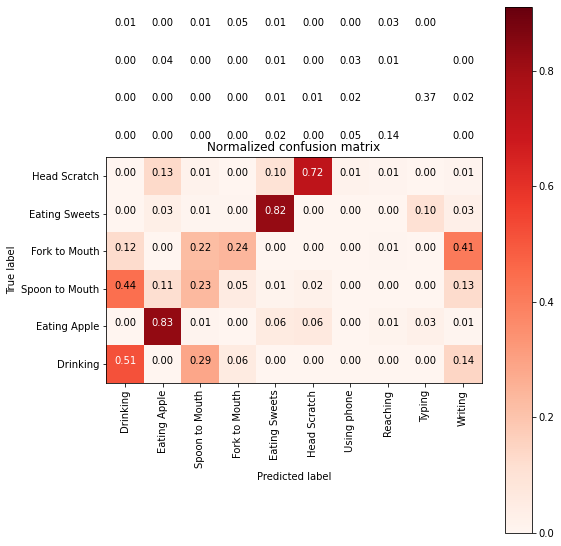

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.45      0.51      0.48       635
           2       0.67      0.83      0.74       528
           3       0.33      0.23      0.27       722
           4       0.58      0.24      0.34       610
           5       0.77      0.82      0.79       555
           6       0.89      0.72      0.80       682
           7       0.43      0.05      0.09       592
           8       0.75      0.57      0.65       620
           9       0.39      0.91      0.55       544
          10       0.51      0.88      0.64       552

    accuracy                           0.56      6040
   macro avg       0.58      0.58      0.53      6040
weighted avg       0.58      0.56      0.53      6040



In [71]:
# Grid search for non-hand to mouth movements
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train2, y_train2, X_test2, y_test2, class_labels=all_labels)

training the model..
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.868000


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.161999


|Accuracy|

    0.5493377483443709


|Confusion Matrix|

 [[210   0 311  77   4   2   0   1   7  23]
 [  3 360  13   0  32  55  35  14  14   2]
 [392  56 125  77   4  18   4   3  16  27]
 [113   0  88 321  11   1   4   7   9  56]
 [  5  19  10  17 402  12  36  12  29  13]
 [  4  88  10   8  26 456  16  24  24  26]
 [  4  20   4   5  35  37 345  42  87  13]
 [  3  21   3   9  11  18  79 424  33  19]
 [ 13   7  10   9  34  23  70  30 331  17]
 [ 17   3  19  49  17  13  17  34  39 344]]


C:\Users\ronan\AppData\Local\Temp\ipykernel_19964\3379774174.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


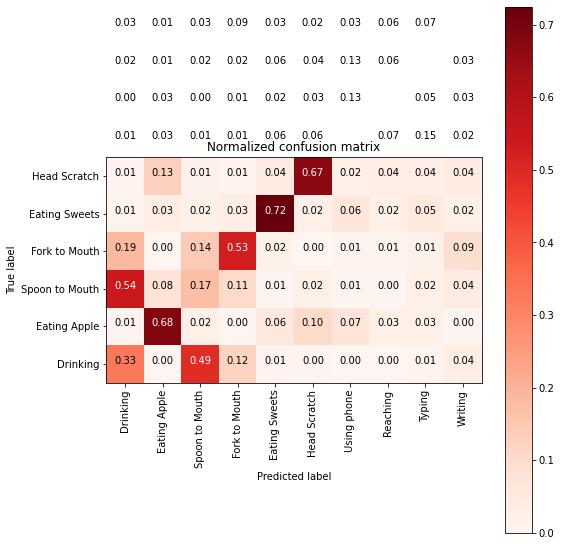

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.27      0.33      0.30       635
           2       0.63      0.68      0.65       528
           3       0.21      0.17      0.19       722
           4       0.56      0.53      0.54       610
           5       0.70      0.72      0.71       555
           6       0.72      0.67      0.69       682
           7       0.57      0.58      0.58       592
           8       0.72      0.68      0.70       620
           9       0.56      0.61      0.58       544
          10       0.64      0.62      0.63       552

    accuracy                           0.55      6040
   macro avg       0.56      0.56      0.56      6040
weighted avg       0.55      0.55      0.55      6040



In [72]:
#KNN for non-hand to mouth movements
from sklearn.neighbors import KNeighborsClassifier

#knn
# start Grid search
parameters = {'n_neighbors': [1, 10, 11, 20, 30]}
log_knn = KNeighborsClassifier(n_neighbors=19)

log_knn_grid = GridSearchCV(log_knn, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_knn_grid_results =  perform_model(log_knn_grid, X_train2, y_train2, X_test2, y_test2, class_labels=all_labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.354396


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001961


|Accuracy|

    0.7978476821192053


|Confusion Matrix|

 [[114   0 484  37   0   0   0   0   0   0]
 [  0 504  12   0   3   5   2   1   1   0]
 [182  63 437  31   0   8   0   0   0   1]
 [ 25   0  27 551   3   0   0   1   0   3]
 [  0   2   0   1 544   3   0   0   0   5]
 [  0   7   5   0   8 659   1   0   0   2]
 [  0   1   0   0   0   0 424  35 131   1]
 [  0   0   0   0   0   4  36 567   8   5]
 [  0   9   0   0   2   0  21   1 510   1]
 [  0   1   3  28   2   0   2   7   0 509]]


C:\Users\ronan\AppData\Local\Temp\ipykernel_19964\3379774174.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


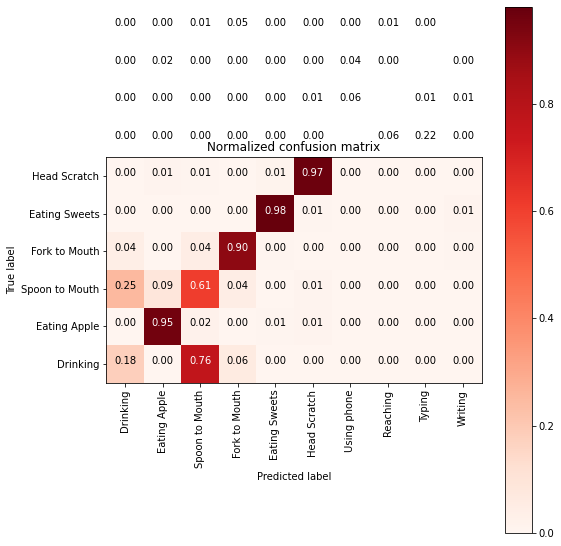

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.36      0.18      0.24       635
           2       0.86      0.95      0.90       528
           3       0.45      0.61      0.52       722
           4       0.85      0.90      0.88       610
           5       0.97      0.98      0.97       555
           6       0.97      0.97      0.97       682
           7       0.87      0.72      0.79       592
           8       0.93      0.91      0.92       620
           9       0.78      0.94      0.85       544
          10       0.97      0.92      0.94       552

    accuracy                           0.80      6040
   macro avg       0.80      0.81      0.80      6040
weighted avg       0.79      0.80      0.79      6040

|      Best Estimator     |

	DecisionTreeClassifier(max_depth=9)

|Best parameters|
	Parameters of best estimator : 

	{'max_depth': 9}

|   No of CrossValidation sets   |

	Total numbre of cross validation sets: 5

|

In [73]:
#Decision Tree for hand to mouth movements
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train2, y_train2, X_test2, y_test2, class_labels=all_labels)
print_grid_search_attributes(dt_grid_results['model'])

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:54.323775


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012990


|Accuracy|

    0.8069536423841059


|Confusion Matrix|

 [[187   0 426  22   0   0   0   0   0   0]
 [  0 506  13   0   4   2   1   0   1   1]
 [414  42 236  19   0  11   0   0   0   0]
 [ 22   0  13 568   0   0   0   0   0   7]
 [  0   0   1   1 549   0   0   0   0   4]
 [  0   1   4   1   4 670   1   0   0   1]
 [  0   0   0   0   0   1 530  16  45   0]
 [  0   0   0   0   0   2  29 587   1   1]
 [  0   5   0   0   0   1  30   0 508   0]
 [  1   0   3  10   1   0   0   4   0 533]]


C:\Users\ronan\AppData\Local\Temp\ipykernel_19964\3379774174.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


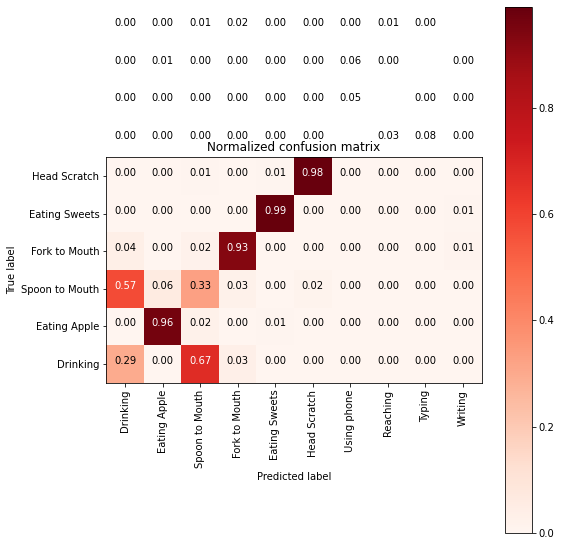

|Classifiction Report|
              precision    recall  f1-score   support

           1       0.30      0.29      0.30       635
           2       0.91      0.96      0.94       528
           3       0.34      0.33      0.33       722
           4       0.91      0.93      0.92       610
           5       0.98      0.99      0.99       555
           6       0.98      0.98      0.98       682
           7       0.90      0.90      0.90       592
           8       0.97      0.95      0.96       620
           9       0.92      0.93      0.92       544
          10       0.97      0.97      0.97       552

    accuracy                           0.81      6040
   macro avg       0.82      0.82      0.82      6040
weighted avg       0.80      0.81      0.81      6040

|      Best Estimator     |

	RandomForestClassifier(max_depth=11, n_estimators=10)

|Best parameters|
	Parameters of best estimator : 

	{'max_depth': 11, 'n_estimators': 10}

|   No of CrossValidation sets   |

	Tota

In [74]:
#Random Forest Classifier for non-hand to mouth movements
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train2, y_train2, X_test2, y_test2, class_labels=all_labels)
print_grid_search_attributes(rfc_grid_results['model'])

In [75]:
import numpy as np
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
ALLGESTURES = [
    "allgestures"
]

SAMPLES_PER_ALLGESTURES = 119
NUM_ALLGESTURES = len(ALLGESTURES)

ONE_HOT_ENCODED_ALLGESTURES = np.eye(NUM_ALLGESTURES)
inputsall = []
outputsall = []

for allgestures_index in range(NUM_ALLGESTURES):
  allgestures = ALLGESTURES[allgestures_index]
  print(f"Processing index {allgestures_index} for gesture '{allgestures}'.")
  
  output = ONE_HOT_ENCODED_ALLGESTURES[allgestures_index]
  
  df = pd.read_csv(allgestures + ".csv", low_memory=False)
  
  num_recordings = int(df.shape[0] / SAMPLES_PER_ALLGESTURES)
  
  print(f"\tThere are {num_recordings} recordings of the {allgestures} gestures.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_ALLGESTURES):
      index = i * SAMPLES_PER_ALLGESTURES + j

      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputsall.append(tensor)
    outputsall.append(output)

inputsall = np.array(inputsall)
outputsall = np.array(outputsall)

Processing index 0 for gesture 'allgestures'.
	There are 203 recordings of the allgestures gestures.


In [76]:
num_inputsall = len(inputsall)
randomizeall = np.arange(num_inputsall)
np.random.shuffle(randomizeall)

inputsall = inputsall[randomizeall]
outputsall = outputsall[randomizeall]

TRAIN_SPLITALL = int(0.6 * num_inputsall)
TEST_SPLITALL = int(0.2 * num_inputsall + TRAIN_SPLITALL)

inputs_train_all, inputs_test_all, inputs_validate_all = np.split(inputsall, [TRAIN_SPLITALL, TEST_SPLITALL])
outputs_train_all, outputs_test_all, outputs_validate_all = np.split(outputsall, [TRAIN_SPLITALL, TEST_SPLITALL])

In [77]:
from tensorflow import keras
from tensorflow.keras import layers

In [78]:
model_all = tf.keras.Sequential()
model_all.add(tf.keras.layers.Dense(20, activation='relu')) 
model_all.add(tf.keras.layers.Dense(15, activation='relu'))
model_all.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) 
model_all.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_all = model.fit(X_train2, y_train2, epochs=600, batch_size=1, validation_data=(X_test2, y_test2))

Epoch 1/600
18117/18117 [==============================] - 20s 1ms/step - loss: 28.6754 - mae: 4.5352 - accuracy: 0.0963 - val_loss: 27.4927 - val_mae: 4.4113 - val_accuracy: 0.1051
Epoch 2/600
18117/18117 [==============================] - 21s 1ms/step - loss: 28.6754 - mae: 4.5352 - accuracy: 0.0963 - val_loss: 27.4927 - val_mae: 4.4113 - val_accuracy: 0.1051
Epoch 3/600
18117/18117 [==============================] - 20s 1ms/step - loss: 28.6754 - mae: 4.5352 - accuracy: 0.0963 - val_loss: 27.4927 - val_mae: 4.4113 - val_accuracy: 0.1051
Epoch 4/600
18117/18117 [==============================] - 21s 1ms/step - loss: 28.6754 - mae: 4.5352 - accuracy: 0.0963 - val_loss: 27.4927 - val_mae: 4.4113 - val_accuracy: 0.1051
Epoch 5/600
18117/18117 [==============================] - 22s 1ms/step - loss: 28.6754 - mae: 4.5352 - accuracy: 0.0963 - val_loss: 27.4927 - val_mae: 4.4113 - val_accuracy: 0.1051
Epoch 6/600
18117/18117 [==============================] - 21s 1ms/step - loss: 28.6754 - 